In [90]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Medicalpremium.csv')


# Print the first 5 rows of the DataFrame
print(df.head())

# Check the shape of the DataFrame
print(df.shape)

print(df.columns)

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases   
0   45         0                      0               0                   0  \
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily   
0     155      57               0                        0  \
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1 

In [91]:
# Check for missing values
df = df.dropna()
print(df.isnull().sum())


Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [92]:
# Print summary statistics
print(df.describe())


              Age    Diabetes  BloodPressureProblems  AnyTransplants   
count  986.000000  986.000000             986.000000      986.000000  \
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies   
count          986.000000  986.000000  986.000000      986.000000  \
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%   

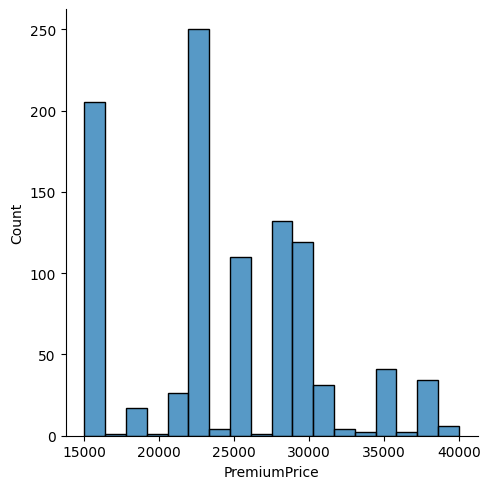

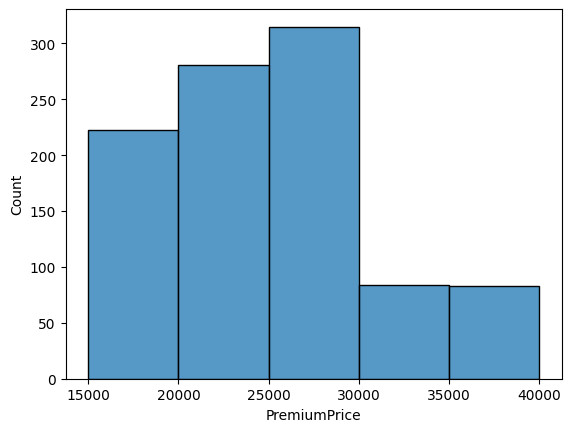

In [93]:
# Visualize the distribution of PremiumPrice
sns.displot(df['PremiumPrice'])
plt.show()
#Buckets are a little too small. A little less detail, but easier to look at
sns.histplot(df['PremiumPrice'], bins=5)
plt.show()
#Price can go up to 40k, but tapers off after 30k


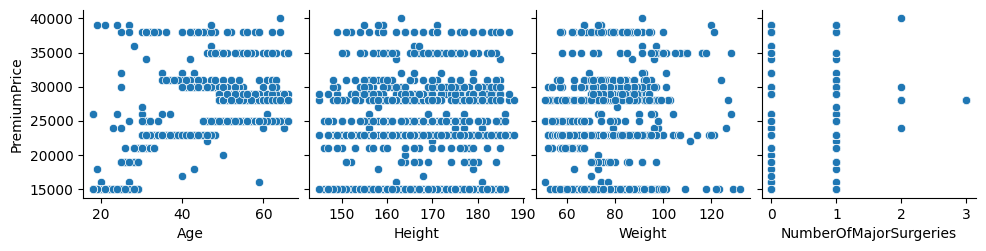

In [94]:

# Visualize the correlation between features and PremiumPrice
sns.pairplot(df, x_vars=['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries'], y_vars=['PremiumPrice'])
plt.show()


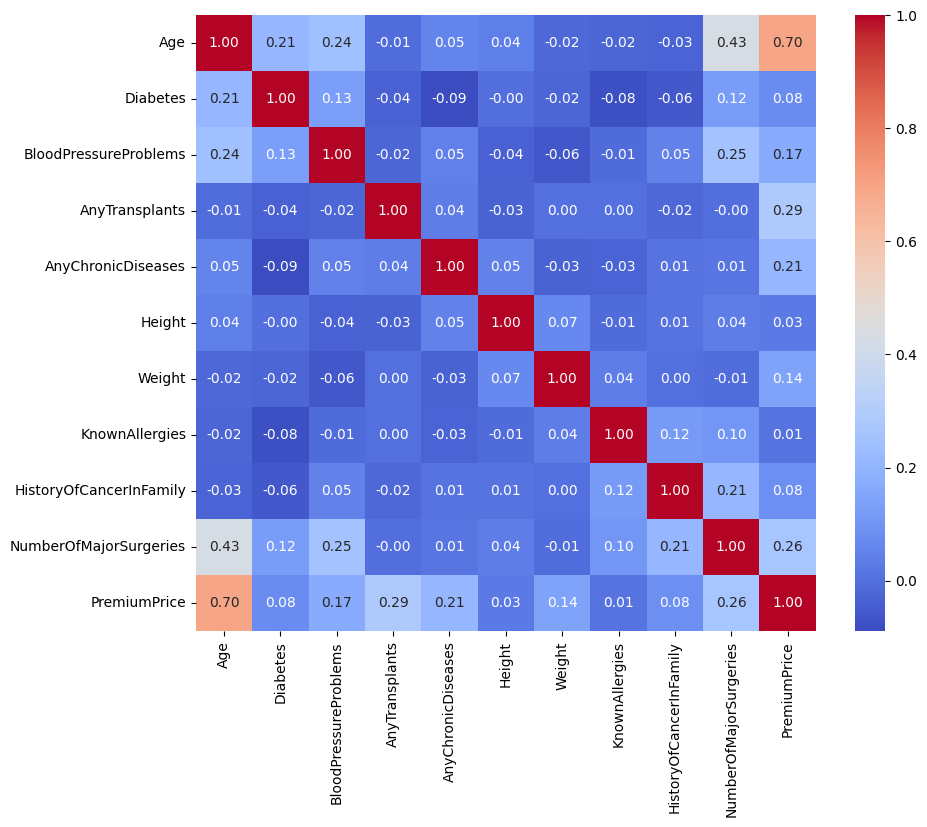

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


In [95]:
#Since the pair plots are difficult to read we can use a correlation matrix to keep it simple
# Display a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#Show this heatmap as a text table
df.corr()

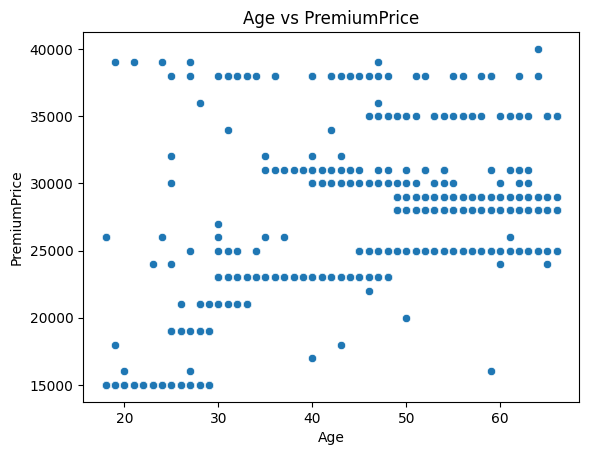

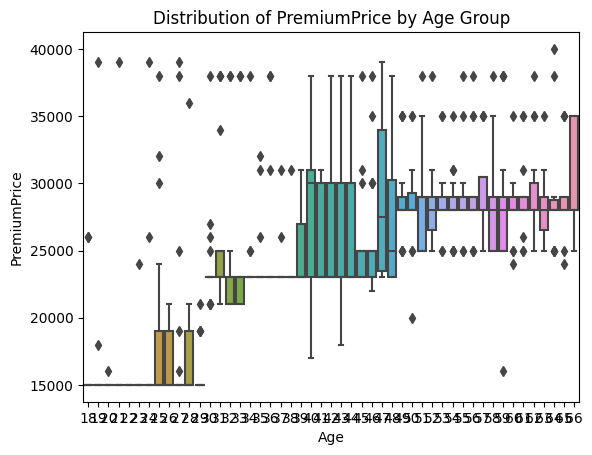

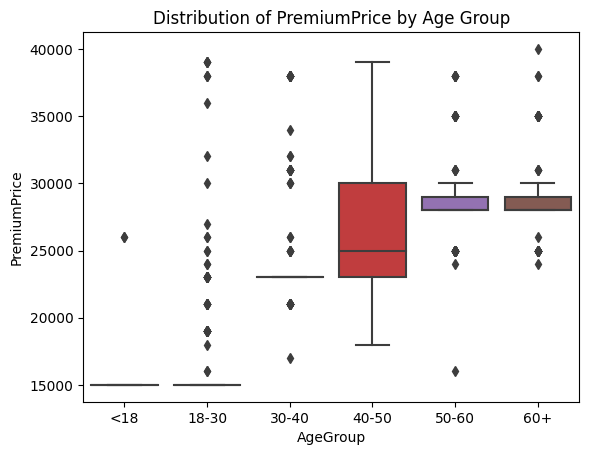

In [96]:
#Since age may be the main factor in predicting price, we may want to look at it more closely
#Investigate the relationship between age and PremiumPrice
sns.scatterplot(data=df, x='Age', y='PremiumPrice')
plt.title("Age vs PremiumPrice")
plt.show()


#Distribution of PremiumPrice by age groups
sns.boxplot(data=df, x='Age', y='PremiumPrice')
plt.title('Distribution of PremiumPrice by Age Group')
plt.show()

#We need some bins to look at this

# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']

# Create a new column with the corresponding age group for each record
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a box plot for PremiumPrice by age group
sns.boxplot(data=df, x='AgeGroup', y='PremiumPrice')
plt.title('Distribution of PremiumPrice by Age Group')
plt.show()
#Trend is a lot more obvious now


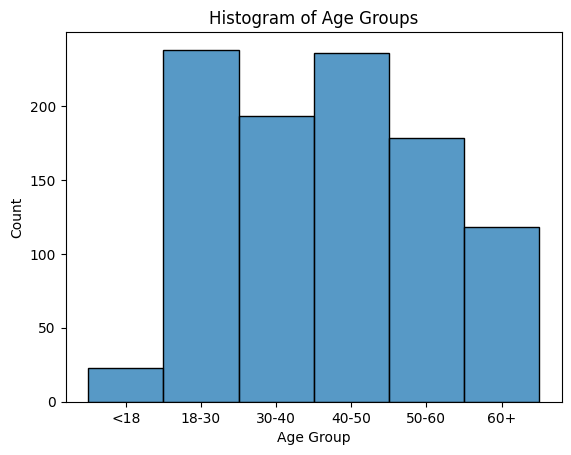

In [97]:
#I do want to make sure we have a roughly equal distribution of ages
#Create a histogram with counts for each age group
sns.histplot(df['AgeGroup'], bins=age_bins, discrete=True)
plt.title('Histogram of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
#While <18 is underrepresented, we can work with this data



In [98]:
# Lets complete our regression
# We'll drop AgeGroup first
df.drop('AgeGroup', axis=1, inplace=True)
#print(df.columns)
# Encode categorical variables
df = pd.get_dummies(df, columns=['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'], drop_first=True)

# Split the data into training and testing sets
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
print(model.score(X_test, y_test))

# Print the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

0.713394427027874
                           Coefficient
Age                         325.506423
Height                       -3.891928
Weight                       69.544618
NumberOfMajorSurgeries     -700.874830
Diabetes_1                 -396.349602
BloodPressureProblems_1     158.110629
AnyTransplants_1           7489.567668
AnyChronicDiseases_1       2547.535105
KnownAllergies_1            195.117272
HistoryOfCancerInFamily_1  2119.821089
